In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the data
file_path = 'Cleaned_Steam_Dataset.xlsx'
data = pd.read_excel(file_path)
data

,Title,Game's Age (Days),Price,Developer,Publisher,Followers,User Review (On a scale of 1 to 7),User Reviews Count,Net Revenue (in million $),User Ratings
0,Red Dead Redemption 2,1786,99.99,Rockstar Games,Rockstar Games,800322,6,578915,1100,9
1,Grand Theft Auto V,3482,29.99,Rockstar North,Rockstar Games,3240105,6,1728306,990,9
2,ELDEN RING,974,59.99,"FromSoftware, Inc.","FromSoftware, Inc., Bandai Namco Entertainment",1011933,6,712931,820,9
3,Black Myth: Wukong,67,59.99,Game Science,Game Science,1222760,7,709346,820,10
4,Cyberpunk 2077,1416,59.99,CD PROJEKT RED,CD PROJEKT RED,1437630,6,687290,790,9
...,...,...,...,...,...,...,...,...,...,...
254,NBA 2K21,1200,49.99,Visual Concepts,2K,300000,2,50000,2,6
255,Postal III,4000,10.99,Trashmasters,Akella,18000,1,7000,1,6
256,Ride to Hell: Retribution,3700,19.99,Eutechnyx,Deep Silver,12000,1,5000,1,5
257,War Z,3900,5.99,Hammerpoint Interactive,OP Productions,22000,1,12000,1,6


In [10]:
# Preprocessing
# Handling missing values (if any)
data.fillna(method='ffill', inplace=True)

/var/folders/xv/wq7mr3g17qv81kq0q5kclg1w0000gn/T/ipykernel_14400/1423036603.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [12]:
# Encode categorical variables (Developer and Publisher)
label_encoders = {}
for column in ['Developer', 'Publisher']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [14]:
# Features and target variable
X = data[['Game\'s Age (Days)', 'Price', 'Developer', 'Publisher', 'Followers',
          'User Review (On a scale of 1 to 7)', 'User Reviews Count', 'Net Revenue (in million $)']]
y = data['User Ratings']

In [16]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# SVM Classifier
svm = SVC(probability=True, kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [22]:
# Predictions
y_pred = svm.predict(X_test)


In [24]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       0.88      0.70      0.78        10
           7       0.60      0.60      0.60         5
           8       0.00      0.00      0.00         1
           9       0.89      0.96      0.92        25
          10       1.00      0.91      0.95        11

    accuracy                           0.85        52
   macro avg       0.56      0.53      0.54        52
weighted avg       0.86      0.85      0.85        52



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


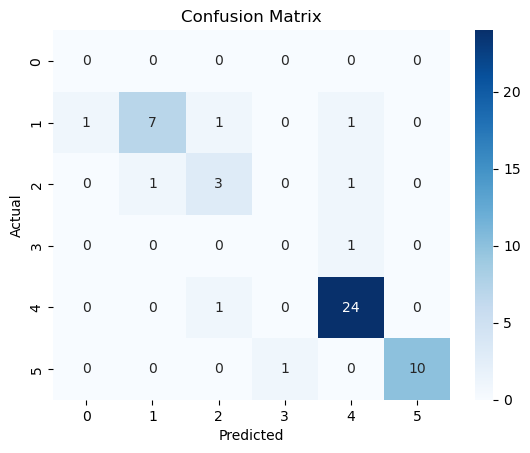

In [26]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Predicting for a new game
new_observation = [365, 59.99, 3, 5, 5000000, 6, 10000, 800]  # Example data
new_observation = scaler.transform([new_observation])  # Scale the new observation
predicted_class = svm.predict(new_observation)
predicted_prob = svm.predict_proba(new_observation)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Displaying results
print(f"Predicted Class: {predicted_class[0]}")
print(f"Predicted Probabilities: Class={predicted_prob[0]}")

Predicted Class: 9
Predicted Probabilities: Class=[0.00732244 0.00319128 0.01324552 0.02823995 0.01508689 0.92115255
 0.01176137]


In [ ]:
Explanation of Each Value:
365: Game's age in days (1 year old).
59.99: Price of the game in dollars.
3: Encoded developer (a specific developer from your dataset after encoding).
5: Encoded publisher (a specific publisher from your dataset after encoding).
5000000: Number of followers for the game.
6: User review score on a scale of 1 to 7.
10000: Number of user reviews.
800: Net revenue in millions of dollars.